## Task1 : Predict the percentage of an student based on the no. of study hours.

## Name : Sandeep Patel

## Objective:

There is a given dataset of student which includes number of hours he/se studies and scores.we have to develop a linear regression 
model to predict score of student bssed on the number of hours he/she studies. 

## import libraries

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Exploratory Data Analysis

In [24]:
#reading csv file
s_data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now find the relationship between data by plotting a 2-D graph

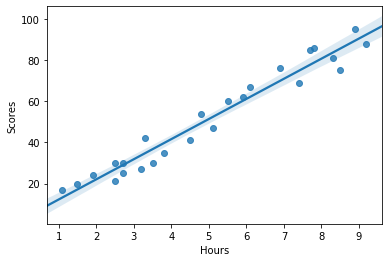

In [25]:
hours = s_data['Hours']
score = s_data['Scores']
sns.regplot(x=hours,y=score)
plt.show()

From the above graph we can see that, there is a positive linear relationsip between the no. of hours studied and percentage of score.


Now checking that what degree does the independent variable(hours) affect the dependent varable(Scores)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


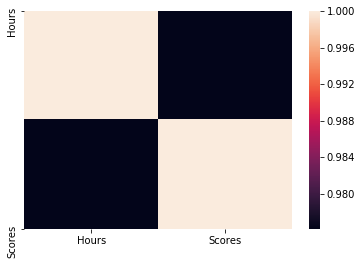

In [26]:
corr_matrix = s_data.corr()
print(corr_matrix)
sns.heatmap(corr_matrix)
plt.show()

Here we can see the hours and scores are strogly  corelated

# Modelling

From Sctterplot and correlation values simple linear regression is suitable to give accurate prediction.

## Importing libraries for Modelling

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [28]:
lr = LinearRegression()
hours = np.array(hours).reshape(-1,1)
score = np.array(score)
lr.fit(hours,score)
score_predict = lr.predict(hours)
score_predict

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

Now lets see the regression line generated by the model 

In [29]:
cofficient = lr.coef_
intercept = lr.intercept_
equation = 'Score = '+str(cofficient[0])+"Hours + "+str(intercept)
equation

'Score = 9.775803390787472Hours + 2.483673405373196'

## Analysis Of Model

 Now to checking  accuracy of  Model.we have to calculate:-

1. Cofficient Of Determination

In [31]:
lr.score(hours,score)

0.9529481969048356

here we can see that cofficient of determination value is very high(95.29%). here that change is observed the score  in due to hours studied 
done by the student.


2. Mean Squared Error

In [32]:
mean_squared_error(score,score_predict)

28.88273050924546

As we can see the mean_squared_error value is low so that we can say that model seems to be a good fit

In [34]:
mean_absolute_error(score,score_predict)

4.972805319866375

As we can see the mean_absolute_error value is low so that we can say that model seems to be a good fit

Now plotting a distribution plot between actual score value and predicted score value 

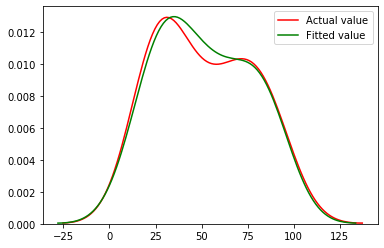

In [37]:
#distribution plot
axis1 = sns.distplot(score,hist=False,color='r',label='Actual value')
sns.distplot(score_predict,hist=False,color='g',label='Fitted value',ax = axis1)
plt.show()

As we can see that the our prdicted value almost overlap to the given score value 

## Predicting Marks for Test Data

lets a student studies 9.25hours/day then what is its score

In [38]:
lr.predict([[9.25]])

array([92.90985477])

As we can see that the student got 92.91 % score for 9.25 hours/day daily study.the resulte is quite accurate 

# Thankyou